In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
# Environment and imports
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dataset config
labels = ["NORMAL", "PNEUMONIA"]
img_size = 100

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # 0 NORMAL, 1 PNEUMONIA
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

# Load splits
train = get_data("/kaggle/input/chest-xray-pneumonia/chest_xray/train")
val = get_data("/kaggle/input/chest-xray-pneumonia/chest_xray/val")
test = get_data("/kaggle/input/chest-xray-pneumonia/chest_xray/test")

# Split into X/y and normalize
def split_xy(items):
    X, y = [], []
    for feature, label in items:
        X.append(feature)
        y.append(label)
    X = (np.array(X) / 255.0).reshape(-1, img_size, img_size, 1)
    y = np.array(y).reshape(-1, 1)
    return X, y

x_train, y_train = split_xy(train)
x_val, y_val = split_xy(val)
x_test, y_test = split_xy(test)



2025-08-18 16:19:40.556329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755533980.802948      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755533980.875764      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


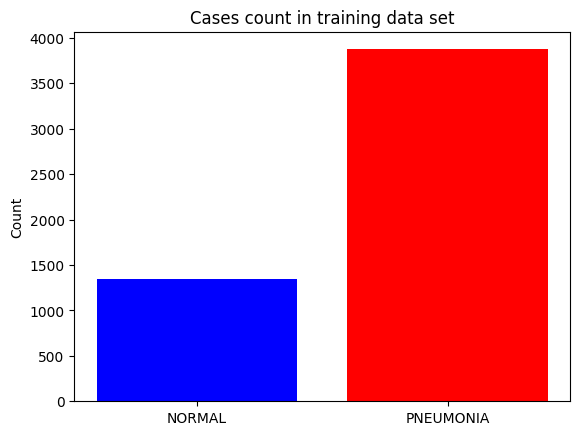

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

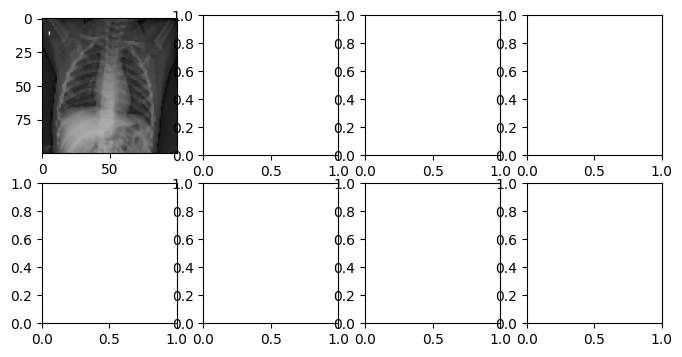

In [3]:

# Quick class balance plot
positives = [x for x, y in zip(x_train, y_train) if y == 1]
negatives = [x for x, y in zip(x_train, y_train) if y == 0]
plt.bar(labels, [len(negatives), len(positives)], color=["blue", "red"])
plt.title("Cases count in training data set")
plt.ylabel("Count")
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(8,4))
for i in range(4):
    axs[0][i].imshow(negatives[i].squeeze(), cmap="gray")
    axs[i].axis('off')
    axs[1][i].imshow(positives[i].squeeze(), cmap="gray")
    axs[1][i].axis('off')
axs.set_ylabel("Normal", rotation=0, labelpad=20, fontsize=12, fontweight='bold')
axs[1].set_ylabel("Pneumonia", rotation=0, labelpad=20, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 16:21:44.942338: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 723ms/step - accuracy: 0.7565 - loss: 0.5802 - val_accuracy: 0.8750 - val_loss: 0.3580
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 726ms/step - accuracy: 0.9371 - loss: 0.1696 - val_accuracy: 0.9375 - val_loss: 0.2393
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 720ms/step - accuracy: 0.9518 - loss: 0.1338 - val_accuracy: 0.7500 - val_loss: 0.3204
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 721ms/step - accuracy: 0.9562 - loss: 0.1145 - val_accuracy: 1.0000 - val_loss: 0.1257
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 728ms/step - accuracy: 0.9768 - loss: 0.0693 - val_accuracy: 0.8750 - val_loss: 0.3246
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 719ms/step - accuracy: 0.9773 - loss: 0.0709 - val_accuracy: 0.9375 - val_loss: 0.1856
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 726ms/step - accuracy: 0.9796 - loss: 0.0546 - val_accuracy: 0.9375 - val_loss: 0.0972
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 718ms/step - accuracy: 

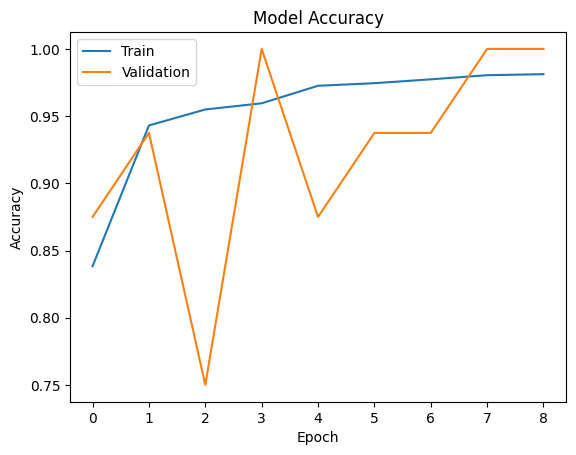

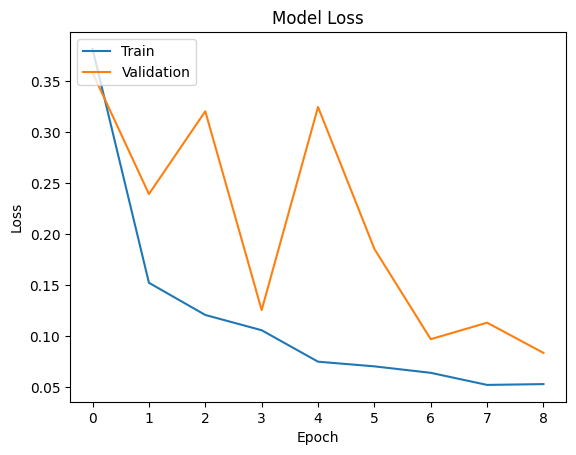

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Raw prediction: [[0.5480637]]
Predicted: PNEUMONIA


/tmp/ipykernel_36/4255155049.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(pred[0] >= 0.5)


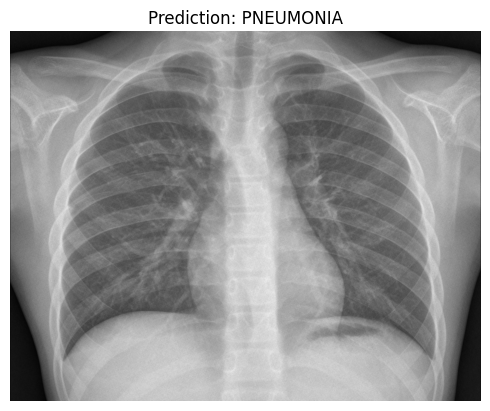

Test accuracy: 0.7564102411270142
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step


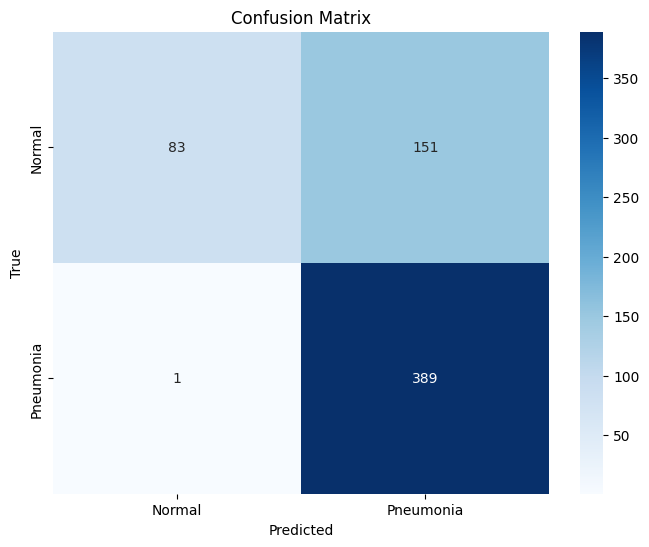

In [4]:
# Define model
model = Sequential([
    Conv2D(64, (3,3), input_shape=x_train.shape[1:]),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(128, (3,3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(256, (3,3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(64),
    Dropout(0.5),
    Dense(1),
    Activation("sigmoid")
])

model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train with early stopping (optional)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save in Keras format
model.save("sequential_tf.keras")

# Single-image prediction helper
def prepare(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale", target_size=(img_size, img_size))
    arr = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    return arr.reshape(-1, img_size, img_size, 1)

# Example prediction
image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0017-0001.jpeg"
loaded = load_model("sequential_tf.keras")
pred = loaded.predict(prepare(image_path))
pred_label = int(pred[0] >= 0.5)
print("Raw prediction:", pred)
print("Predicted:", labels[pred_label])

# Show image with prediction
img_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Prediction: {labels[pred_label]}")
plt.axis('off')
plt.show()

# Evaluate on test set
test_loss, test_acc = loaded.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

# Confusion matrix (threshold at 0.5 for sigmoid)
y_prob = loaded.predict(x_test).ravel()
y_pred_labels = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_test.ravel(), y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Pneumonia"],
            yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [7]:
# VGG16 Autoencoder / CNN Classification Pipeline (clean code version)

# Reproducibility and imports
import os, glob, random, warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed as np_seed
np_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import tensorflow as tf
from tensorflow.random import set_seed as tf_seed
tf_seed(42)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configs
IMG_SIZE = 224
BATCH = 32
SEED = 42

# Paths (Kaggle Chest X-Ray Pneumonia)
main_path = "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")

# Collect image file paths
train_normal = glob.glob(os.path.join(train_path, "NORMAL", "*.jpeg"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA", "*.jpeg"))

test_normal = glob.glob(os.path.join(test_path, "NORMAL", "*.jpeg"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA", "*.jpeg"))

train_list = list(train_normal) + list(train_pneumonia)
test_list = list(test_normal) + list(test_pneumonia)

df_train = pd.DataFrame({
    "class": np.concatenate([np.array(['Normal']*len(train_normal)),
                             np.array(['Pneumonia']*len(train_pneumonia))]),
    "image": train_list
})

df_test = pd.DataFrame({
    "class": np.concatenate([np.array(['Normal']*len(test_normal)),
                             np.array(['Pneumonia']*len(test_pneumonia))]),
    "image": test_list
})

# Train/validation split from df_train
train_df, val_df = train_test_split(
    df_train,
    test_size=0.15,
    stratify=df_train['class'],
    random_state=SEED
)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)



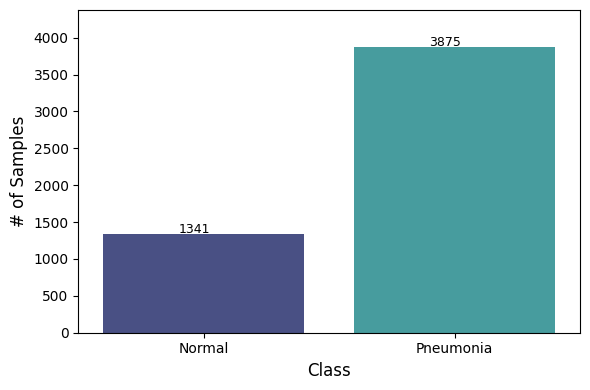

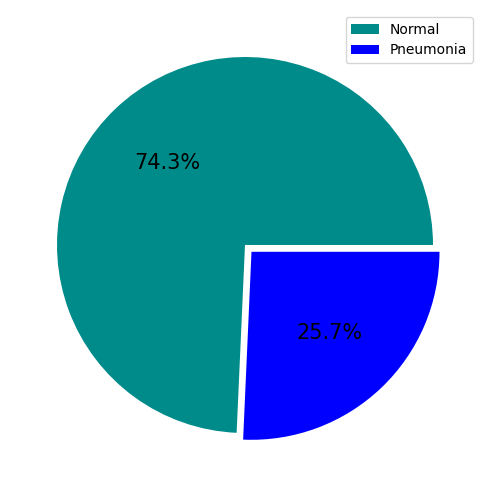

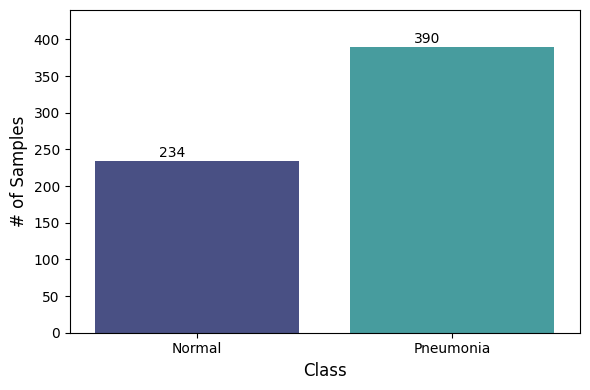

Found 4433 validated image filenames belonging to 2 classes.
Found 783 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,089 (10.00 MB)

 Trainable params: 2,620,865 (10.00 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - binary_accuracy: 0.7385 - loss: 0.6112 - val_binary_accuracy: 0.7409 - val_loss: 1.3316 - learning_rate: 3.0000e-05
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - binary_accuracy: 0.9375 - loss: 0.1975 - val_binary_accuracy: 0.7422 - val_loss: 1.3374 - learning_rate: 3.0000e-05
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8541 - loss: 0.3165
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
138/138 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - binary_accuracy: 0.8542 - loss: 0.3164 - val_binary_accuracy: 0.7435 - val_loss: 1.9737 - learning_rate: 3.0000e-05
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - binary_accuracy: 0.8438 - loss: 0.3371 - val_binary_accuracy: 0.7396 - val_loss: 2.0043 - learning_rate: 6.0000e-06
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8996 - loss: 0.2419
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.199999951

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet152v2_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [8]:
# Basic EDA plots (optional)
plt.figure(figsize=(6,4))
ax = sns.countplot(x='class', data=df_train, palette="mako")
plt.xlabel("Class", fontsize=12)
plt.ylabel("# of Samples", fontsize=12)
plt.ylim(0, max(df_train['class'].value_counts().max()+500, 500))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+10), fontsize=9)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
df_train['class'].value_counts().plot(
    kind='pie',
    labels=['',''],
    autopct='%1.1f%%',
    colors=['darkcyan','blue'],
    explode=[0,0.05],
    textprops={"fontsize":15}
)
plt.legend(labels=['Normal','Pneumonia'])
plt.ylabel("")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
ax = sns.countplot(x='class', data=df_test, palette="mako")
plt.xlabel("Class", fontsize=12)
plt.ylabel("# of Samples", fontsize=12)
plt.ylim(0, max(df_test['class'].value_counts().max()+50, 50))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+5), fontsize=10)
plt.tight_layout()
plt.show()

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255)

ds_train = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)
ds_val = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)
ds_test = val_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=1,
    shuffle=False
)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_delta=1e-7,
    cooldown=0,
    verbose=1
)

# Baseline CNN (simple VGG-like, not actual VGG16 backbone)
def get_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block 1
    x = layers.Conv2D(16, 3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 2
    x = layers.Conv2D(32, 3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 3
    x = layers.Conv2D(64, 3, padding='valid')(x)
    x = layers.Conv2D(64, 3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs, outputs)
    return model

keras.backend.clear_session()
model = get_model()
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=3e-5),
    metrics=['binary_accuracy']
)
model.summary()

history = model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=max(1, len(train_df)//BATCH),
    validation_steps=max(1, len(val_df)//BATCH)
)

model.save('sequential_latest.h5')

val_score = model.evaluate(ds_val, steps=max(1, len(val_df)//BATCH), verbose=0)
print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

test_score = model.evaluate(ds_test, steps=len(df_test), verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Transfer Learning with ResNet152V2
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False
)
base_model.trainable = False

def get_pretrained():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = tf.keras.applications.resnet_v2.preprocess_input(inputs)
    x = base_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model_pt = keras.Model(inputs, outputs)
    return model_pt

keras.backend.clear_session()
model_pretrained = get_pretrained()
model_pretrained.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),
    metrics=['binary_accuracy']
)
model_pretrained.summary()

history_pt = model_pretrained.fit(
    ds_train,
    epochs=50,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=max(1, len(train_df)//BATCH),
    validation_steps=max(1, len(val_df)//BATCH)
)

model_pretrained.save('pretrained_model.h5')

val_score_pt = model_pretrained.evaluate(ds_val, steps=max(1, len(val_df)//BATCH), verbose=0)
print('Val loss:', val_score_pt[0])
print('Val accuracy:', val_score_pt[1])

test_score_pt = model_pretrained.evaluate(ds_test, steps=len(df_test), verbose=0)
print('Test loss:', test_score_pt[0])
print('Test accuracy:', test_score_pt[1])

# Fine-tuning (unfreeze top layers)
base_model.trainable = True
for layer in base_model.layers[:-13]:
    layer.trainable = False

model_pretrained.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=2e-6),
    metrics=['binary_accuracy']
)
model_pretrained.summary()

history_ft = model_pretrained.fit(
    ds_train,
    epochs=50,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=max(1, len(train_df)//BATCH),
    validation_steps=max(1, len(val_df)//BATCH)
)

val_score_ft = model_pretrained.evaluate(ds_val, steps=max(1, len(val_df)//BATCH), verbose=0)
print('Val loss (FT):', val_score_ft[0])
print('Val accuracy (FT):', val_score_ft[1])

test_score_ft = model_pretrained.evaluate(ds_test, steps=len(df_test), verbose=0)
print('Test loss (FT):', test_score_ft[0])
print('Test accuracy (FT):', test_score_ft[1])


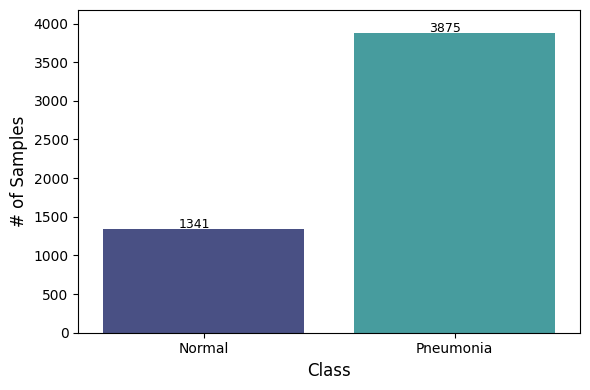

Train Set - Normal


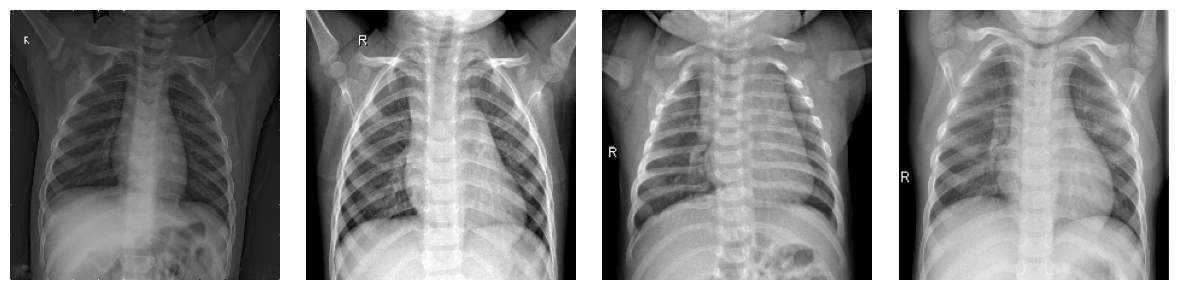

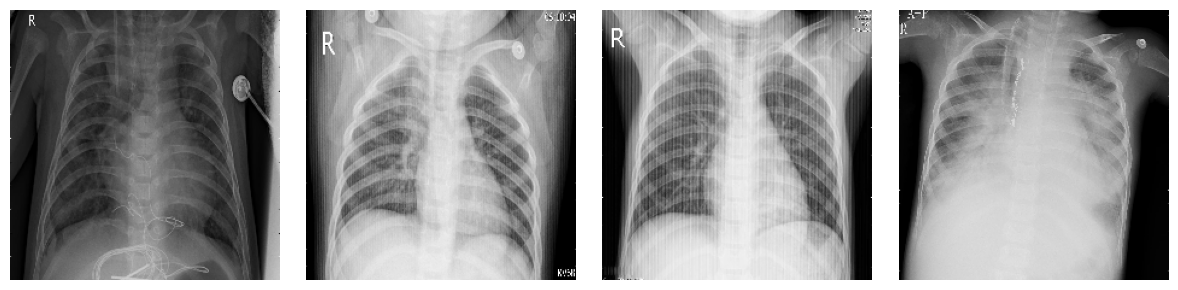

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,089 (10.00 MB)

 Trainable params: 2,620,865 (10.00 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - binary_accuracy: 0.7227 - loss: 0.6584 - val_binary_accuracy: 0.7471 - val_loss: 1.1901 - learning_rate: 3.0000e-05
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - binary_accuracy: 0.8750 - loss: 0.4620 - val_binary_accuracy: 0.7441 - val_loss: 1.2031 - learning_rate: 3.0000e-05
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8556 - loss: 0.3179
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - binary_accuracy: 0.8556 - loss: 0.3178 - val_binary_accuracy: 0.7432 - val_loss: 1.8659 - learning_rate: 3.0000e-05
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - binary_accuracy: 0.9062 - loss: 0.2590 - val_binary_accuracy: 0.7412 - val_loss: 1.8815 - learning_rate: 6.0000e-06
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - binary_accuracy: 0.8938 - loss: 0.2513
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.1999999

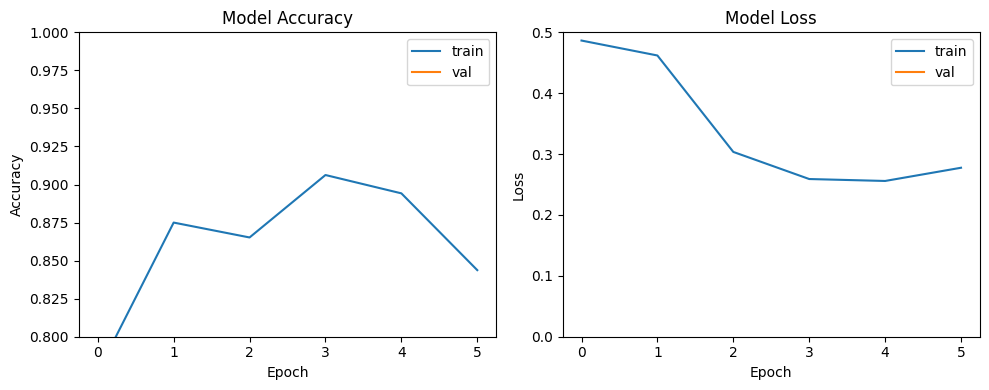

Test Accuracy:  0.625


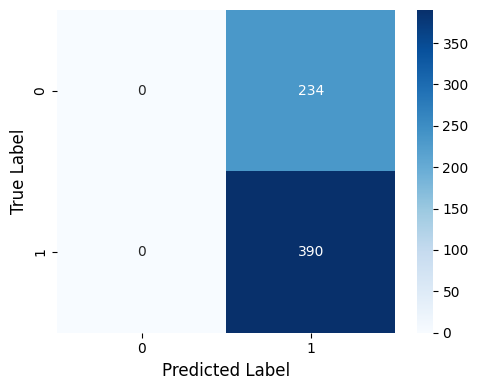

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624

ROC_AUC:  0.796718167872014


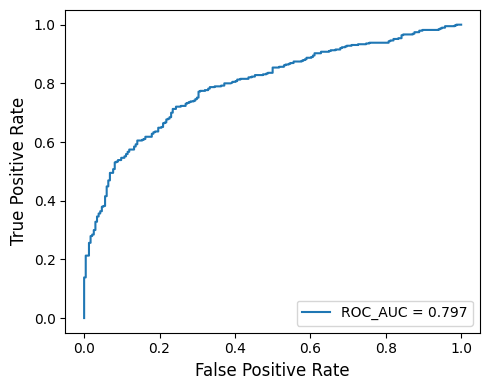

In [9]:
# Clean Sequential CNN pipeline (Kaggle Chest X-Ray Pneumonia)

# Reproducibility and imports
import os, glob, random, warnings, pickle
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed as np_seed
np_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import tensorflow as tf
from tensorflow.random import set_seed as tf_seed
tf_seed(42)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Config
IMG_SIZE = 224
BATCH = 32
SEED = 42

# Paths (Kaggle dataset)
main_path = "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_path = os.path.join(main_path, "train")
test_path  = os.path.join(main_path, "test")

# Gather image paths
train_normal = glob.glob(os.path.join(train_path, "NORMAL", "*.jpeg"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA", "*.jpeg"))

test_normal = glob.glob(os.path.join(test_path, "NORMAL", "*.jpeg"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA", "*.jpeg"))

train_list = list(train_normal) + list(train_pneumonia)
test_list = list(test_normal) + list(test_pneumonia)

df_train = pd.DataFrame({
    'class': np.concatenate([np.array(['Normal']*len(train_normal)),
                             np.array(['Pneumonia']*len(train_pneumonia))]),
    'image': train_list
})
df_test = pd.DataFrame({
    'class': np.concatenate([np.array(['Normal']*len(test_normal)),
                             np.array(['Pneumonia']*len(test_pneumonia))]),
    'image': test_list
})

# Data visualization (optional)
sample_plt = plt.figure(figsize=(6,4))
ax = sns.countplot(x='class', data=df_train, palette="mako")
plt.xlabel("Class", fontsize=12)
plt.ylabel("# of Samples", fontsize=12)
plt.ylim(0, max(df_train['class'].value_counts().max() + 300, 500))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize=9)
plt.tight_layout()
plt.show()

samplecnt_fig = sample_plt.get_figure()
samplecnt_fig.savefig("samplecount.tiff")

print('Train Set - Normal')
plot_normal = plt.figure(figsize=(12,3))
for i in range(0, min(4, len(train_normal))):
    plt.subplot(1,4,i+1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()
plot_normal.get_figure().savefig("normalset_fig.tiff")

plot_pneumonia = plt.figure(figsize=(12,3))
for i in range(0, min(4, len(train_pneumonia))):
    plt.subplot(1,4,i+1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()
plot_pneumonia.get_figure().savefig("pneumoniaset_fig.tiff")

# Split train/val
train_df, val_df = train_test_split(
    df_train,
    test_size=0.20,
    random_state=SEED,
    stratify=df_train['class']
)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255.)

ds_train = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)
ds_val = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH,
    seed=SEED
)
ds_test = val_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='class',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=1,
    shuffle=False
)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True
)
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_delta=1e-7,
    cooldown=0,
    verbose=1
)

# Model definition (Sequential-like via Functional API)
def get_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block 1
    x = layers.Conv2D(16, 3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 2
    x = layers.Conv2D(32, 3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block 3
    x = layers.Conv2D(64, 3, padding='valid')(x)
    x = layers.Conv2D(64, 3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

keras.backend.clear_session()
model_sequential = get_model()
model_sequential.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=3e-5),
    metrics=['binary_accuracy']
)
model_sequential.summary()

# Train
history_sequential = model_sequential.fit(
    ds_train,
    epochs=50,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=max(1, len(train_df)//BATCH),
    validation_steps=max(1, len(val_df)//BATCH)
)

# Save model and history
model_sequential.save('sequential_final.h5')
with open('trainHistoryDict.pkl', 'wb') as f:
    pickle.dump(history_sequential.history, f)

# Plot training curves
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history_sequential.epoch, history_sequential.history['binary_accuracy'], label='train')
ax[0].plot(history_sequential.epoch, history_sequential.history['val_binary_accuracy'], label='val')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(0.80, 1.0)
ax[0].legend(loc='best')

ax[1].plot(history_sequential.epoch, history_sequential.history['loss'], label='train')
ax[1].plot(history_sequential.epoch, history_sequential.history['val_loss'], label='val')
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(0, 0.5)
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()
fig.savefig("sequential.tiff")

# Evaluation on test set
num_label = {'Normal': 0, 'Pneumonia': 1}
Y_test = df_test['class'].copy().map(num_label).astype(int)

ds_test.reset()
predictions = model_sequential.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels = (predictions > 0.5).astype(int)

print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

cm = metrics.confusion_matrix(Y_test, pred_labels)
plt.figure(figsize=(5,4))
sequential_confusion_matrix = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()
sequential_confusion_matrix.get_figure().savefig("sequential_confusion_matrix.tiff")

# Classification report
print(metrics.classification_report(Y_test, pred_labels, labels=[0, 1]))

# ROC-AUC
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='ROC_AUC = %0.3f' % roc_auc)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_sequential.tiff', format='tiff')
plt.show()


In [ ]:
!pip install tensorflow numpy pandas scikit-learn opencv-python matplotlib

In [12]:
import os, random, cv2, numpy as np, pandas as pd, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

DATASET_DIR = "/content/chest_xray"
IMG_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 10
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [13]:
def collect_image_paths(dataset_root):
    import glob
    train_path = os.path.join(dataset_root, "train")
    test_path  = os.path.join(dataset_root, "test")

    def make_df(path):
        normal = glob.glob(os.path.join(path, "NORMAL", "*"))
        pneumonia = glob.glob(os.path.join(path, "PNEUMONIA", "*"))
        return pd.DataFrame({
            "image": normal + pneumonia,
            "class": ["Normal"] * len(normal) + ["Pneumonia"] * len(pneumonia)
        })

    return make_df(train_path), make_df(test_path)

def build_generator(df, img_size, batch_size, shuffle=True, augment=False):
    datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1 if augment else 0.0,
        width_shift_range=0.1 if augment else 0.0,
        height_shift_range=0.1 if augment else 0.0,
        horizontal_flip=augment
    )
    return datagen.flow_from_dataframe(
        df, x_col="image", y_col="class",
        target_size=(img_size, img_size),
        class_mode="binary",
        batch_size=batch_size, shuffle=shuffle
    )


In [15]:
def get_sequential_cnn(img_size=IMG_SIZE):
    inputs = layers.Input(shape=(img_size, img_size, 3))

    x = layers.Conv2D(16, 3, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(32, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)


In [16]:
import os

base = "/kaggle/input/chest-xray-pneumonia"
inner = os.path.join(base, "chest_xray")
if os.path.exists(inner):
    DATASET_DIR = inner
else:
    DATASET_DIR = base

print("Using dataset path:", DATASET_DIR)
!ls $DATASET_DIR


Using dataset path: /kaggle/input/chest-xray-pneumonia/chest_xray
chest_xray  __MACOSX  test  train  val


In [17]:
df_train_all, df_test = collect_image_paths(DATASET_DIR)
print("Train images found:", len(df_train_all))
print("Test images found:", len(df_test))

if len(df_train_all) == 0:
    raise ValueError("❌ No images found — check DATASET_DIR path above!")

train_df, val_df = train_test_split(df_train_all, test_size=0.2,
                                    stratify=df_train_all["class"], random_state=SEED)

train_gen = build_generator(train_df, IMG_SIZE, BATCH_SIZE, augment=True)
val_gen   = build_generator(val_df, IMG_SIZE, BATCH_SIZE)
test_gen  = build_generator(df_test, IMG_SIZE, 1, shuffle=False)

model = get_sequential_cnn(IMG_SIZE)
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss="binary_crossentropy",
              metrics=["binary_accuracy"])
model.summary()

es = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
rlrop = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2)

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS,
                    callbacks=[es, rlrop],
                    verbose=1)

model.save("pneumonia_cnn.h5")
print("✅ Model saved as pneumonia_cnn.h5")


Train images found: 5216
Test images found: 624
Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


2025-10-12 19:40:47.418505: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,109,665 (4.23 MB)

 Trainable params: 1,109,441 (4.23 MB)

 Non-trainable params: 224 (896.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 157s 576ms/step - binary_accuracy: 0.7535 - loss: 0.5728 - val_binary_accuracy: 0.7433 - val_loss: 1.1732 - learning_rate: 1.0000e-04
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 123s 470ms/step - binary_accuracy: 0.8797 - loss: 0.2892 - val_binary_accuracy: 0.7443 - val_loss: 1.4579 - learning_rate: 1.0000e-04
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 117s 448ms/step - binary_accuracy: 0.9258 - loss: 0.1888 - val_binary_accuracy: 0.9080 - val_loss: 0.1804 - learning_rate: 1.0000e-04
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 113s 432ms/step - binary_accuracy: 0.9168 - loss: 0.1957 - val_binary_accuracy: 0.9368 - val_loss: 0.1373 - learning_rate: 1.0000e-04
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 116s 443ms/step - binary_accuracy: 0.9287 - loss: 0.1857 - val_binary_accuracy: 0.9502 - val_loss: 0.1308 - learning_rate: 1.0000e-04
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 114s 437ms/step - binary_accuracy: 0.9422 - loss: 0.1628 - val_binary_accuracy: 0.9148 - v

In [18]:
preds = model.predict(test_gen, verbose=1)
pred_labels = (preds > 0.5).astype(int).reshape(-1)
y_true = df_test["class"].map({"Normal":0, "Pneumonia":1}).values

print("Test Accuracy:", accuracy_score(y_true, pred_labels))
print(classification_report(y_true, pred_labels, target_names=["Normal","Pneumonia"]))
print("ROC-AUC:", roc_auc_score(y_true, preds))


624/624 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step
Test Accuracy: 0.8012820512820513
              precision    recall  f1-score   support

      Normal       0.93      0.51      0.66       234
   Pneumonia       0.77      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.85      0.74      0.76       624
weighted avg       0.83      0.80      0.78       624

ROC-AUC: 0.9263587552049091


In [19]:
import tensorflow as tf
import numpy as np
import cv2
import os
import random

# -----------------------------
# CONFIG
# -----------------------------
IMG_SIZE = 224  # your model input size
N_REPRESENTATIVE = 100  # number of samples for calibration
MODEL_PATH = "pneumonia_cnn.h5"
TFLITE_MODEL_PATH = "pneumonia_cnn_int8.tflite"
TEST_IMAGE_DIR = "/kaggle/input/chest-xray-pneumonia/"  # folder containing your test images

# Load model
model = tf.keras.models.load_model(MODEL_PATH)

# -----------------------------
# REPRESENTATIVE DATASET FUNCTION
# -----------------------------
def representative_dataset_gen_from_folder(img_folder, img_size, n=N_REPRESENTATIVE):
    input_name = model.inputs[0].name  # fixed here
    images = [os.path.join(img_folder, f) for f in os.listdir(img_folder) 
              if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    images = random.sample(images, min(n, len(images)))
    
    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size, img_size))
        img = np.expand_dims(img, axis=0).astype(np.uint8)  # INT8 input
        yield {input_name: img}  # dictionary required for TFLite


# -----------------------------
# CONVERT TO TFLITE INT8
# -----------------------------
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = lambda: representative_dataset_gen_from_folder(TEST_IMAGE_DIR, IMG_SIZE)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

# Convert
tflite_model = converter.convert()

# Save
with open(TFLITE_MODEL_PATH, "wb") as f:
    f.write(tflite_model)

print(f"✅ Fully INT8 quantized model saved as {TFLITE_MODEL_PATH}")


Saved artifact at '/tmp/tmpxn7_9hjr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140294161403920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161405072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161405264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161404496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161403152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161404880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161406800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161407376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161407568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161406416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294161404112

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1760299304.646328      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1760299304.646896      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1760299304.669344      36 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


✅ Fully INT8 quantized model saved as pneumonia_cnn_int8.tflite


fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


In [25]:
import shutil

# Move file to Kaggle's output directory (visible in the "Files" sidebar)
shutil.move("pneumonia_cnn_int8.tflite", "/kaggle/working/pneumonia_cnn_quant.tflite")

print("✅ File moved to /kaggle/working. You can now download it from the left sidebar under 'Files'.")


✅ File moved to /kaggle/working. You can now download it from the left sidebar under 'Files'.


In [26]:
import os

for root, dirs, files in os.walk("/kaggle", topdown=True):
    for name in files:
        if name.endswith(".tflite"):
            print(os.path.join(root, name))


/kaggle/working/pneumonia_cnn_quant.tflite


In [27]:
import shutil

shutil.move("/kaggle/working/pneumonia_cnn_quant.tflite", "/kaggle/working/pneumonia_cnn_quant.tflite")


'/kaggle/working/pneumonia_cnn_quant.tflite'

In [28]:
!ls -lh /kaggle/working/

total 18M
-rw-r--r-- 1 root root  13M Oct 12 18:39 pneumonia_cnn.h5
-rw-r--r-- 1 root root 4.3M Oct 12 18:59 pneumonia_cnn_quant.tflite


In [20]:
import tensorflow as tf
import numpy as np
import cv2

from tensorflow.keras.models import load_model
model = load_model("/kaggle/working/pneumonia_cnn.h5")
# Assuming 'model' and 'df_test' exist in memory already
IMG_SIZE = 224  # or whatever your input size is

def representative_dataset_gen(df, img_size, n=100):
    for _, row in df.sample(n=min(n, len(df))).iterrows():
        img = cv2.imread(row["image"])
        if img is None: 
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size, img_size)).astype(np.float32) / 255.0
        yield [np.expand_dims(img, axis=0)]

# Convert the model to quantized TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = lambda: representative_dataset_gen(df_test, IMG_SIZE)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS_INT8,
    tf.lite.OpsSet.TFLITE_BUILTINS,
]
tflite_model = converter.convert()

# ✅ Save properly in Kaggle working directory
with open("/kaggle/working/pneumonia_cnn_quant.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Quantized model saved successfully at /kaggle/working/pneumonia_cnn_quant.tflite")


Saved artifact at '/tmp/tmpbcnajgb5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140294140430288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294140444496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128518160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294140432400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128519696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128520272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128520464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128519312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517584

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1760299322.301230      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1760299322.301274      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


RuntimeError: tensorflow/lite/kernels/reshape.cc:92 num_input_elements != num_output_elements (50176 != 49152)Node number 7 (RESHAPE) failed to prepare.

In [26]:
import tensorflow as tf
import os

# Save Keras model
model.save("/kaggle/working/pneumonia_cnn.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_path = "/kaggle/working/pneumonia_cnn.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp6xpmn7a5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140294140430288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294140444496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128518160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294140432400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128519696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128520272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128520464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128519312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140294128517584

W0000 00:00:1760299477.297453      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1760299477.297490      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


In [27]:
import zipfile

zip_path = "/kaggle/working/pneumonia_models.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write("/kaggle/working/pneumonia_cnn.h5", arcname="pneumonia_cnn.h5")
    zipf.write("/kaggle/working/pneumonia_cnn.tflite", arcname="pneumonia_cnn.tflite")


In [29]:
import os
import zipfile
from IPython.display import FileLink

# Path to working directory
working_dir = "/kaggle/working/"
zip_path = os.path.join(working_dir, "all_outputs.zip")

# Create a zip of all files in the working directory
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for file_name in os.listdir(working_dir):
        file_path = os.path.join(working_dir, file_name)
        if os.path.isfile(file_path):
            zipf.write(file_path, arcname=file_name)

# Create a clickable download link
FileLink(zip_path)


OSError: [Errno 28] No space left on device